# Multi Label Classification Model
Using this [article](https://debuggercafe.com/multi-label-image-classification-with-pytorch-and-deep-learning/) for reference.


## Imports

In [1]:
# Run this when working locally
# import os 
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Basic imports
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# Torch imports
import torch
import torchvision
import torch.optim as optim
from torch.nn import init
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Custom functions
from processing_functions_2 import *

import matplotlib.pyplot as plt 

## GPU Setup

In [3]:
# check if GPU available and assign it
torch.cuda.is_available()
device = torch.device('cuda', 1)
device

device(type='cuda', index=1)

## DataLoader

In [4]:
# xray_path = 'D:/dental_training_images/images/'
# anomaly_path = 'D:/dental_training_images/labels/'
# segmentation_path = 'D:/dental_training_images/segments/'

# xray_filenames = os.listdir(xray_path)
# anomaly_filenames = os.listdir(anomaly_path)
# segmentation_filenames = os.listdir(segmentation_path)

# base_files = [os.path.basename(file) for file in final_drop_list]

# output_path = 'SegmentedTeethImages121/'

# images, labels = [], []

# for xray in tqdm(xray_filenames):
#     if (xray[:-4] in [x[:-4] for x in anomaly_filenames]) and (xray[:-4] in [x[:-4] for x in segmentation_filenames]):
#         anomalies_df = anomaly_matching(anomaly_path + xray[:-4] + ".txt", 
#                                         segmentation_path + xray[:-4] + ".txt", 
#                                         io.imread(xray_path + xray).shape, 
#                                         normalized=True)
#         anomalies_df = multi_labeling(anomalies_df)

#         for index, row in anomalies_df.iterrows():
#             yolo_coord = row[['x_center', 'y_center', 'width', 'height']].to_list()
#             tooth_file = extract_image(xray_path + xray,
#                                        yolo_coord, 
#                                        int(row['tooth_number']), 
#                                        output_folder=output_path, 
#                                        print_names=False)
            
#             if os.path.basename(tooth_file) not in base_files:
#                 images.append(tooth_file)
#                 labels.append(row['anomaly_category'])
#                 print(tooth_file)
#             else: 
#                 print("Failed image ", tooth_file)            

In [5]:
final_drop_list = ['C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00123_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11591509584534580458511587025412911715131_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.12912863616020610458715256000051614818828_20.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10028842080465500458430592052923973032886_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.12912863616020610458715256000051614818828_24.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15113542944196530458522034012782428854655_19.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10887106448134030458524128012406311154890_16.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21684312624243980458720933448293281230066_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.24182354960595130458622493226051970446453_32.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00165_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20814826864192750458549198028913331726255_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20877731664554610458531508041263195315560_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20006703152153070458639320557576431221217_30.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22520423232229990458701762000044396111318_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.30904206048181060458645325037734094705562_24.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10421654960294860458522405034066011855487_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10421654960294860458522405034066011855487_10.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.30065549008345490458547160011854112105730_30.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15944055248520490458528113106420857518312_29.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21771456432323360458504615001534232026567_31.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10703818784253540458630153104820407822362_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20891103552518640458528820028636548406061_11.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20891103552518640458528820028636548406061_12.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13163710704054250458601046063520253113198_21.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22276418800257420458654511149940652400941_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21682855168466350458601376008801513435269_20.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15299610256437910458400622069565898217562_12.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.12749805808182360458539969091423621928887_16.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21143002832241440458623058009110301614825_4.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.16435264720415030458702129000361784411898_10.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20303741424210800458632640078030530411775_26.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20597337648390240458707731007673418403261_11.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10421654960294860458522405034066011855487_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10565162352429740458530910111824768342089_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.14277128048171170458664642398924468414310_21.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22543502400138560458616650066450582758859_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11535701136057740458562134591930547309956_30.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.14524523536310520458458047054155729811055_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11591509584534580458511587025412911715131_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15546451680602980458505168186796411531706_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20873455520519020458641165026210303459653_2.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11293311824490440458612755048271547861270_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11349418240423690458410642065500265862121_16.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.12291415072220460458503760087731901554401_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11930319904322330458708280011050993811491_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.14060930592303060458500785196194739562030_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13163710704054250458601046063520253113198_11.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.16413823152302100458716688011493316711462_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22543502400138560458616650066450582758859_23.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10176019280227510458610999011793033750526_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11789964240126030458510277051235356462180_12.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21202034912197240458634300253232152810024_19.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21202034912197240458634300253232152810024_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15299610256437910458400622069565898217562_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10630001952398430458715592048121145514573_25.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20873455520519020458641165026210303459653_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.23495705952070170458630801075924812261817_29.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10176019280227510458610999011793033750526_9.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.30904206048181060458645325037734094705562_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10421654960294860458522405034066011855487_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15611849744124390458648787462912126920627_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22226053312252700458564977558890671614069_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22785634416541240458622036408260021744642_12.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20596147584246720458528068136585059414911_23.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20229934384466000458421426056203096924406_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22276418800257420458654511149940652400941_19.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13176122528076470458601250042404716514535_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21270421424118440458529327330564738402078_27.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22131612864646870458520404169236077304830_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13669525792364660458407416036672532927622_21.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21684312624243980458720933448293281230066_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21432359088458200458615428021760525764451_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15944055248520490458528113106420857518312_26.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20229934384466000458421426056203096924406_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00213_4.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22785634416541240458622036408260021744642_16.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.25452046960033860458602805290035580424719_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22131612864646870458520404169236077304830_9.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21143002832241440458623058009110301614825_1.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21143002832241440458623058009110301614825_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20454540736477130458339997025101097047519_20.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00218_12.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.23291859264302330458755303175905604250038_1.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00218_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.23291859264302330458755303175905604250038_3.jpg',                     
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21746954032216560458516063062172604733275_16.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.31139107456433070458322106105522091218645_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.12899254848171780458408291000105427208077_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10278429264005240458503255183316248659306_11.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15113542944196530458522034012782428854655_25.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13919502976391760458538773090770671829527_25.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11350554496293990458740673007403648508002 - Copy_15.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21666104528653720458613751013475442430580_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21557062656177930458343219070321981637851_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15764346592421870458536183286645732724133_15.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20870450704478780458607623002474917630846_11.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21270421424118440458529327330564738402078_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.30746337664236130458700189002605448007669_26.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13376055536190260458534113535473935441793_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21664817520152390458534485263103434020303_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11663264688257010458625955000422219121617_13.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11132658400479970458414056001250778655766_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20081607840186950458618211009125990232400_26.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20172722288118670458536217136330364927513_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.23136215440442200458533591055815887757361_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22502552096633900458633926000845074825764_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20172722288118670458536217136330364927513_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20467337616476270458633741228505368404265_15.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.24363444784604650458428263000041522532200_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10042008176214120458429902067895443955409_26.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.14998661280157100458618467118181913008571_15.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21135518000331080458420149146972902918924_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13669525792364660458407416036672532927622_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22722936384174340458534066146705980816875_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.23136215440442200458533591055815887757361_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20006703152153070458639320557576431221217_22.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10659319392172760458659380579623202412807_23.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20172722288118670458536217136330364927513_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00146_14.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20652102800262270458412779142625092717172_4.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13376055536190260458534113535473935441793_20.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.20454540736477130458339997025101097047519_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate3-00022_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.14447105040504260458544406081140437434379_4.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.15912403808238310458425447052566394013227_10.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00002_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00191_9.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13592908288129460458433332562924792705280_27.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.11591509584534580458511587025412911715131_18.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.12640122480206560458543448001395876821539_26.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21140629904511680458418007091375490831063_5.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.24193529296003800458612401063361399747493_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13033748144432990458735132002124728833201_29.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00002_20.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22502552096633900458633926000845074825764_16.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.13033748144432990458735132002124728833201_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00159_8.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22685135232122440458519109266761294511224_12.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21835050496105040458713326011344443628397_25.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.14615365120465950458433559055920593001267_20.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10278429264005240458503255183316248659306_17.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.21270421424118440458529327330564738402078_7.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.22142160480363360458513973275440523164919_25.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10421654960294860458522405034066011855487_3.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10030708032351340458422440040212943937371_15.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/1.2.840.114257.3.6.10278429264005240458503255183316248659306_6.jpg',
                'C:/Documents/Dental_Detection/Segmented_Images_7/cate2-00170_21.jpg']

In [6]:
class TeethDataLoader_MultiLabel(data.Dataset): # input is folder name where folders of teeth are stored
                                        # requires overwrite __getitem__(), supporting fetching a data sample for a given key
                                        # can also overwrite __len__(), which is expected to return the size of the dataset

    def __init__(self, xray_path, anomaly_path, segmentation_path, final_drop_list = final_drop_list): # path below = ./training_images/
        xray_filenames = os.listdir(xray_path)
        anomaly_filenames = os.listdir(anomaly_path)
        segmentation_filenames = os.listdir(segmentation_path)

        base_files = [os.path.basename(file) for file in final_drop_list]

        output_path = 'SegmentedTeethImages125/'

        self.images, self.labels = [], []

        for xray in tqdm(xray_filenames):
            if (xray[:-4] in [x[:-4] for x in anomaly_filenames]) and (xray[:-4] in [x[:-4] for x in segmentation_filenames]):
                anomalies_df = anomaly_matching(anomaly_path + xray[:-4] + ".txt", 
                                                segmentation_path + xray[:-4] + ".txt", 
                                                io.imread(xray_path + xray).shape, 
                                                normalized=True)
                anomalies_df = multi_labeling(anomalies_df)

                for index, row in anomalies_df.iterrows():
                    yolo_coord = row[['x_center', 'y_center', 'width', 'height']].to_list()
                    tooth_file = extract_image(xray_path + xray,
                                               yolo_coord, 
                                               int(row['tooth_number']), 
                                               output_folder=output_path, 
                                               print_names=False)

                    if os.path.basename(tooth_file) not in base_files:
                        self.images.append(tooth_file)
                        self.labels.append(row['anomaly_category'])
#                         print(tooth_file)
                    else: 
                        print("Dropped image: ", tooth_file)       

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        # Read in & resize
#         print(self.images[index])
        img = cv2.imread(self.images[index])     # loads image from file
        img = cv2.resize(img, (224, 224))        # resize image to 224x224

        # Convert image using clahe
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
        img = clahe.apply(img)

        # Convert back to 2x255x255
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = np.array(img, dtype=np.float32)    # change data type to float
        img = (img / 255.)                       # normalize colors to be 0-1

        img = torchvision.transforms.ToTensor()(img)  # convert to tensor
        label = self.labels[index]
        
        return img.float(), torch.FloatTensor([label]) # returns tensor of modified image and label

## Modeling Setup

Model uses pretrained resnet50 from the PyTorch library. This may be updated later to improve performance.

In [7]:
from torchvision import models as models

def model(pretrained, requires_grad):
    model = models.resnet50(progress=True, pretrained=pretrained)
    # to freeze the hidden layers
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    # to train the hidden layers
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    # make the classification layer learnable
    model.fc = nn.Linear(2048, 8)
    return model

In [20]:
def model_net_v3(pretrained, requires_grad):
    model = models.resnet34(progress=True, pretrained=pretrained)
    # to freeze the hidden layers
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    # to train the hidden layers
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    # make the classification layer learnable
    model.fc = nn.Linear(2048, 8)
    return model

In [9]:
# training function
def train(model, dataloader, optimizer, criterion, device):
    print('Training')
    model.train()
    counter = 0
    train_running_loss = 0.0
    for (x, y) in tqdm(dataloader):
        counter += 1
        data, target = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        # apply sigmoid activation to get all the outputs between 0 and 1
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, target.squeeze(1))
        train_running_loss += loss.item()
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
    train_loss = train_running_loss / counter
    return train_loss


# validation function
def validate(model, dataloader, criterion, device):
    print('Validating')
    model.eval()
    counter = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for (x, y) in tqdm(dataloader):
            counter += 1
            data, target = x.to(device), y.to(device)
            outputs = model(data)
            # apply sigmoid activation to get all the outputs between 0 and 1
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, target.squeeze(1))
            val_running_loss += loss.item()
        
        val_loss = val_running_loss / counter
        return val_loss

## Model Training
### Main Model

In [10]:
#intialize the model
model_v1 = model(pretrained=True, requires_grad=False).to(device)
# learning parameters
lr = 0.0001
epochs = 50
batch_size = 32
optimizer = optim.Adam(model_v1.parameters(), lr=lr)
criterion = nn.BCELoss()

In [11]:
xray_path = 'D:/dental_training_images/images/'
anomaly_path = 'D:/dental_training_images/labels/'
segmentation_path = 'D:/dental_training_images/segments/'

In [12]:
dataset = TeethDataLoader_MultiLabel(xray_path, anomaly_path, segmentation_path)

# generate shuffled sequence of numbers based on how many images, split train/test
train_idx, valid_idx= train_test_split(np.arange(len(dataset.labels)), test_size=0.2, shuffle=True)

# Samples elements randomly from a given list of indices, without replacement
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)

# loads images associated with ids/samples from above
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

  0%|          | 0/1084 [00:00<?, ?it/s]

New directory created


  0%|          | 2/1084 [00:01<16:15,  1.11it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10028842080465500458430592052923973032886_6.jpg


  0%|          | 3/1084 [00:02<15:15,  1.18it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10030708032351340458422440040212943937371_15.jpg


  0%|          | 5/1084 [00:04<16:30,  1.09it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10042008176214120458429902067895443955409_26.jpg


  1%|          | 8/1084 [00:06<13:48,  1.30it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10176019280227510458610999011793033750526_9.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10176019280227510458610999011793033750526_14.jpg


  1%|          | 11/1084 [00:08<13:15,  1.35it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10278429264005240458503255183316248659306_6.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10278429264005240458503255183316248659306_11.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10278429264005240458503255183316248659306_17.jpg


  1%|▏         | 15/1084 [00:12<15:44,  1.13it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10421654960294860458522405034066011855487_3.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10421654960294860458522405034066011855487_6.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10421654960294860458522405034066011855487_10.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10421654960294860458522405034066011855487_13.jpg


  1%|▏         | 16/1084 [00:13<14:30,  1.23it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10421654960294860458522405034066011855487_17.jpg


  2%|▏         | 19/1084 [00:15<14:46,  1.20it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10565162352429740458530910111824768342089_18.jpg


  2%|▏         | 21/1084 [00:18<16:48,  1.05it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10630001952398430458715592048121145514573_25.jpg


  2%|▏         | 22/1084 [00:18<15:59,  1.11it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10659319392172760458659380579623202412807_23.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10703818784253540458630153104820407822362_14.jpg


  2%|▏         | 27/1084 [00:23<17:50,  1.01s/it]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.10887106448134030458524128012406311154890_16.jpg


  3%|▎         | 35/1084 [00:30<15:55,  1.10it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11132658400479970458414056001250778655766_8.jpg


  4%|▎         | 39/1084 [00:33<11:35,  1.50it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11293311824490440458612755048271547861270_8.jpg


  4%|▍         | 41/1084 [00:34<11:02,  1.57it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11349418240423690458410642065500265862121_16.jpg


  4%|▍         | 43/1084 [00:35<09:57,  1.74it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11350554496293990458740673007403648508002 - Copy_15.jpg


  5%|▍         | 51/1084 [00:42<15:59,  1.08it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11535701136057740458562134591930547309956_30.jpg


  5%|▍         | 52/1084 [00:43<16:19,  1.05it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11591509584534580458511587025412911715131_13.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11591509584534580458511587025412911715131_14.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11591509584534580458511587025412911715131_18.jpg


  5%|▍         | 54/1084 [00:45<15:03,  1.14it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11663264688257010458625955000422219121617_13.jpg


  6%|▌         | 60/1084 [00:50<13:29,  1.26it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11789964240126030458510277051235356462180_12.jpg


  6%|▌         | 62/1084 [00:51<13:00,  1.31it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.11930319904322330458708280011050993811491_17.jpg


  7%|▋         | 72/1084 [01:00<12:41,  1.33it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.12291415072220460458503760087731901554401_13.jpg


  8%|▊         | 83/1084 [01:10<15:50,  1.05it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.12640122480206560458543448001395876821539_26.jpg


  8%|▊         | 85/1084 [01:12<15:05,  1.10it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.12749805808182360458539969091423621928887_16.jpg


  8%|▊         | 90/1084 [01:17<15:42,  1.06it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.12899254848171780458408291000105427208077_8.jpg


  8%|▊         | 92/1084 [01:19<14:58,  1.10it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.12912863616020610458715256000051614818828_20.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.12912863616020610458715256000051614818828_24.jpg


  9%|▉         | 98/1084 [01:24<15:52,  1.04it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13033748144432990458735132002124728833201_7.jpg


  9%|▉         | 99/1084 [01:26<17:24,  1.06s/it]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13033748144432990458735132002124728833201_29.jpg


 10%|▉         | 104/1084 [01:29<12:26,  1.31it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13163710704054250458601046063520253113198_11.jpg


 10%|▉         | 105/1084 [01:30<12:55,  1.26it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13163710704054250458601046063520253113198_21.jpg


 10%|▉         | 106/1084 [01:30<11:22,  1.43it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13176122528076470458601250042404716514535_3.jpg


 10%|█         | 113/1084 [01:36<14:14,  1.14it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13376055536190260458534113535473935441793_20.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13376055536190260458534113535473935441793_22.jpg


 11%|█         | 117/1084 [01:40<16:14,  1.01s/it]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13592908288129460458433332562924792705280_27.jpg


 11%|█         | 120/1084 [01:43<16:00,  1.00it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13669525792364660458407416036672532927622_17.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13669525792364660458407416036672532927622_21.jpg


 12%|█▏        | 131/1084 [01:53<10:44,  1.48it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.13919502976391760458538773090770671829527_25.jpg


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. C

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.14060930592303060458500785196194739562030_3.jpg


 13%|█▎        | 139/1084 [02:00<12:33,  1.25it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.14277128048171170458664642398924468414310_21.jpg


 13%|█▎        | 141/1084 [02:02<12:53,  1.22it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.14447105040504260458544406081140437434379_4.jpg


 14%|█▎        | 147/1084 [02:07<10:38,  1.47it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.14524523536310520458458047054155729811055_17.jpg


 14%|█▍        | 152/1084 [02:11<11:32,  1.35it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.14615365120465950458433559055920593001267_20.jpg


 14%|█▍        | 157/1084 [02:14<09:26,  1.64it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.14998661280157100458618467118181913008571_15.jpg


 15%|█▍        | 162/1084 [02:18<11:46,  1.31it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15113542944196530458522034012782428854655_19.jpg


 15%|█▌        | 163/1084 [02:18<12:27,  1.23it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15113542944196530458522034012782428854655_25.jpg


 15%|█▌        | 166/1084 [02:20<11:08,  1.37it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15299610256437910458400622069565898217562_12.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15299610256437910458400622069565898217562_18.jpg


 16%|█▌        | 170/1084 [02:24<10:59,  1.39it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15546451680602980458505168186796411531706_13.jpg


 16%|█▌        | 172/1084 [02:26<13:34,  1.12it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15611849744124390458648787462912126920627_14.jpg


 16%|█▋        | 178/1084 [02:30<11:23,  1.32it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15764346592421870458536183286645732724133_15.jpg


 17%|█▋        | 183/1084 [02:35<14:35,  1.03it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15912403808238310458425447052566394013227_10.jpg


 17%|█▋        | 184/1084 [02:36<14:29,  1.04it/s]C:\Users\dental-1\Documents\av\dental-anomaly-detection\processing_functions_2.py:172: UserWarning: SegmentedTeethImages125/1.2.840.114257.3.6.15944055248520490458528113106420857518312_16.jpg is a low contrast image
  io.imsave(filename_new, image_cropped)
 17%|█▋        | 185/1084 [02:37<15:35,  1.04s/it]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15944055248520490458528113106420857518312_26.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.15944055248520490458528113106420857518312_29.jpg


 18%|█▊        | 194/1084 [02:45<12:31,  1.18it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.16413823152302100458716688011493316711462_7.jpg


 18%|█▊        | 195/1084 [02:46<13:12,  1.12it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.16435264720415030458702129000361784411898_10.jpg


 18%|█▊        | 198/1084 [02:48<12:05,  1.22it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20006703152153070458639320557576431221217_22.jpg


 18%|█▊        | 199/1084 [02:49<13:17,  1.11it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20006703152153070458639320557576431221217_30.jpg


 19%|█▉        | 204/1084 [02:53<13:02,  1.12it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20081607840186950458618211009125990232400_26.jpg


 19%|█▉        | 207/1084 [02:56<12:19,  1.19it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20172722288118670458536217136330364927513_3.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20172722288118670458536217136330364927513_6.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20172722288118670458536217136330364927513_22.jpg


 19%|█▉        | 210/1084 [02:57<08:40,  1.68it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20229934384466000458421426056203096924406_18.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20229934384466000458421426056203096924406_22.jpg


 20%|██        | 220/1084 [03:02<07:45,  1.86it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20303741424210800458632640078030530411775_26.jpg


 21%|██        | 228/1084 [03:05<05:20,  2.67it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20454540736477130458339997025101097047519_7.jpg


 21%|██        | 229/1084 [03:06<05:57,  2.39it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20454540736477130458339997025101097047519_20.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20467337616476270458633741228505368404265_15.jpg


 22%|██▏       | 241/1084 [03:13<08:10,  1.72it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20596147584246720458528068136585059414911_23.jpg


 22%|██▏       | 243/1084 [03:14<07:44,  1.81it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20597337648390240458707731007673418403261_11.jpg


 23%|██▎       | 244/1084 [03:14<08:55,  1.57it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20652102800262270458412779142625092717172_4.jpg


 24%|██▎       | 256/1084 [03:20<08:14,  1.67it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20814826864192750458549198028913331726255_13.jpg


 24%|██▍       | 264/1084 [03:24<06:01,  2.27it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20870450704478780458607623002474917630846_11.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20873455520519020458641165026210303459653_2.jpg


 24%|██▍       | 265/1084 [03:24<05:42,  2.39it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20873455520519020458641165026210303459653_6.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20877731664554610458531508041263195315560_3.jpg


 25%|██▍       | 267/1084 [03:25<06:55,  1.96it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20891103552518640458528820028636548406061_11.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.20891103552518640458528820028636548406061_12.jpg


 27%|██▋       | 294/1084 [03:36<07:04,  1.86it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21135518000331080458420149146972902918924_22.jpg


 27%|██▋       | 295/1084 [03:37<08:29,  1.55it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21140629904511680458418007091375490831063_5.jpg


 27%|██▋       | 296/1084 [03:38<09:11,  1.43it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21143002832241440458623058009110301614825_1.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21143002832241440458623058009110301614825_3.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21143002832241440458623058009110301614825_4.jpg


 27%|██▋       | 298/1084 [03:39<09:49,  1.33it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21202034912197240458634300253232152810024_8.jpg


 28%|██▊       | 299/1084 [03:40<09:58,  1.31it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21202034912197240458634300253232152810024_19.jpg


 28%|██▊       | 303/1084 [03:43<09:08,  1.42it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21270421424118440458529327330564738402078_7.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21270421424118440458529327330564738402078_14.jpg


 28%|██▊       | 304/1084 [03:44<09:30,  1.37it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21270421424118440458529327330564738402078_27.jpg


 29%|██▉       | 313/1084 [03:48<05:53,  2.18it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21432359088458200458615428021760525764451_8.jpg


 30%|██▉       | 321/1084 [03:53<06:29,  1.96it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21557062656177930458343219070321981637851_7.jpg


 30%|███       | 329/1084 [03:57<06:30,  1.93it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21664817520152390458534485263103434020303_17.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21666104528653720458613751013475442430580_3.jpg


 31%|███       | 331/1084 [03:58<07:07,  1.76it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21682855168466350458601376008801513435269_20.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21684312624243980458720933448293281230066_14.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21684312624243980458720933448293281230066_22.jpg


 31%|███       | 337/1084 [04:02<08:10,  1.52it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21746954032216560458516063062172604733275_16.jpg


 31%|███▏      | 340/1084 [04:04<06:59,  1.77it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21771456432323360458504615001534232026567_31.jpg


 32%|███▏      | 345/1084 [04:07<07:51,  1.57it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.21835050496105040458713326011344443628397_25.jpg


 34%|███▎      | 365/1084 [04:18<06:47,  1.76it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22131612864646870458520404169236077304830_7.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22131612864646870458520404169236077304830_9.jpg


 34%|███▍      | 367/1084 [04:20<08:06,  1.47it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22142160480363360458513973275440523164919_25.jpg


 35%|███▍      | 375/1084 [04:24<06:07,  1.93it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22226053312252700458564977558890671614069_8.jpg


 35%|███▌      | 382/1084 [04:27<06:39,  1.76it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22276418800257420458654511149940652400941_18.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22276418800257420458654511149940652400941_19.jpg


 37%|███▋      | 397/1084 [04:36<05:45,  1.99it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22502552096633900458633926000845074825764_16.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22502552096633900458633926000845074825764_18.jpg


 37%|███▋      | 400/1084 [04:38<04:34,  2.49it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22520423232229990458701762000044396111318_6.jpg


 37%|███▋      | 402/1084 [04:39<06:29,  1.75it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22543502400138560458616650066450582758859_13.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22543502400138560458616650066450582758859_23.jpg


 39%|███▉      | 421/1084 [04:44<03:20,  3.30it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22685135232122440458519109266761294511224_12.jpg


 39%|███▉      | 424/1084 [04:46<04:21,  2.52it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22722936384174340458534066146705980816875_22.jpg


 40%|███▉      | 430/1084 [04:49<04:28,  2.44it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22785634416541240458622036408260021744642_12.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.22785634416541240458622036408260021744642_16.jpg


 42%|████▏     | 457/1084 [05:04<05:28,  1.91it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.23136215440442200458533591055815887757361_17.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.23136215440442200458533591055815887757361_22.jpg


 43%|████▎     | 471/1084 [05:11<05:02,  2.02it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.23291859264302330458755303175905604250038_1.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.23291859264302330458755303175905604250038_3.jpg


 45%|████▍     | 487/1084 [05:18<03:10,  3.13it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.23495705952070170458630801075924812261817_29.jpg


 50%|█████     | 547/1084 [05:20<00:27, 19.24it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.24182354960595130458622493226051970446453_32.jpg


 51%|█████     | 550/1084 [05:22<00:39, 13.36it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.24193529296003800458612401063361399747493_17.jpg


 53%|█████▎    | 572/1084 [05:23<00:40, 12.73it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.24363444784604650458428263000041522532200_17.jpg


 61%|██████    | 662/1084 [05:28<00:13, 30.43it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.25452046960033860458602805290035580424719_22.jpg


 69%|██████▉   | 750/1084 [05:36<00:24, 13.40it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.30065549008345490458547160011854112105730_30.jpg


 73%|███████▎  | 791/1084 [05:37<00:16, 18.00it/s]Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fr

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.30746337664236130458700189002605448007669_26.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.30904206048181060458645325037734094705562_17.jpg
Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.30904206048181060458645325037734094705562_24.jpg


 77%|███████▋  | 830/1084 [05:42<00:18, 13.64it/s]

Dropped image:  SegmentedTeethImages125/1.2.840.114257.3.6.31139107456433070458322106105522091218645_18.jpg


 92%|█████████▏| 1000/1084 [05:45<00:01, 68.30it/s]

Dropped image:  SegmentedTeethImages125/cate2-00002_6.jpg
Dropped image:  SegmentedTeethImages125/cate2-00002_20.jpg


 96%|█████████▌| 1036/1084 [05:58<00:08,  5.98it/s]

Dropped image:  SegmentedTeethImages125/cate2-00123_7.jpg


 97%|█████████▋| 1048/1084 [06:03<00:13,  2.65it/s]

Dropped image:  SegmentedTeethImages125/cate2-00146_14.jpg


 97%|█████████▋| 1054/1084 [06:05<00:11,  2.67it/s]

Dropped image:  SegmentedTeethImages125/cate2-00159_8.jpg


 98%|█████████▊| 1057/1084 [06:07<00:11,  2.26it/s]

Dropped image:  SegmentedTeethImages125/cate2-00165_3.jpg


 98%|█████████▊| 1059/1084 [06:07<00:10,  2.38it/s]

Dropped image:  SegmentedTeethImages125/cate2-00170_21.jpg


 98%|█████████▊| 1066/1084 [06:10<00:07,  2.49it/s]

Dropped image:  SegmentedTeethImages125/cate2-00191_9.jpg


 99%|█████████▉| 1071/1084 [06:12<00:05,  2.30it/s]

Dropped image:  SegmentedTeethImages125/cate2-00213_4.jpg


 99%|█████████▉| 1073/1084 [06:13<00:04,  2.34it/s]

Dropped image:  SegmentedTeethImages125/cate2-00218_12.jpg
Dropped image:  SegmentedTeethImages125/cate2-00218_13.jpg


 99%|█████████▉| 1075/1084 [06:14<00:03,  2.64it/s]

Dropped image:  SegmentedTeethImages125/cate3-00022_6.jpg


100%|██████████| 1084/1084 [06:17<00:00,  2.87it/s]


In [13]:
# start the training and validation
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model_v1, train_loader, optimizer, criterion, device
    )
    valid_epoch_loss = validate(
        model_v1, valid_loader, criterion, device
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 50
Training


100%|██████████| 342/342 [01:18<00:00,  4.37it/s]


Validating


100%|██████████| 86/86 [00:17<00:00,  4.85it/s]


Train Loss: 0.1676
Val Loss: 0.1319
Epoch 2 of 50
Training


100%|██████████| 342/342 [00:42<00:00,  8.06it/s]


Validating


100%|██████████| 86/86 [00:10<00:00,  8.33it/s]


Train Loss: 0.1308
Val Loss: 0.1268
Epoch 3 of 50
Training


100%|██████████| 342/342 [00:33<00:00, 10.15it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.14it/s]


Train Loss: 0.1266
Val Loss: 0.1237
Epoch 4 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.16it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.17it/s]


Train Loss: 0.1247
Val Loss: 0.1233
Epoch 5 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.15it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.15it/s]


Train Loss: 0.1220
Val Loss: 0.1188
Epoch 6 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.18it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.17it/s]


Train Loss: 0.1202
Val Loss: 0.1173
Epoch 7 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.14it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.17it/s]


Train Loss: 0.1198
Val Loss: 0.1163
Epoch 8 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.04it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.86it/s]


Train Loss: 0.1178
Val Loss: 0.1156
Epoch 9 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.81it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.86it/s]


Train Loss: 0.1167
Val Loss: 0.1143
Epoch 10 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.63it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 11.05it/s]


Train Loss: 0.1153
Val Loss: 0.1137
Epoch 11 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.66it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.76it/s]


Train Loss: 0.1151
Val Loss: 0.1133
Epoch 12 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.55it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.86it/s]


Train Loss: 0.1142
Val Loss: 0.1116
Epoch 13 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.81it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.32it/s]


Train Loss: 0.1136
Val Loss: 0.1128
Epoch 14 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.63it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.86it/s]


Train Loss: 0.1138
Val Loss: 0.1114
Epoch 15 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.57it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.78it/s]


Train Loss: 0.1122
Val Loss: 0.1118
Epoch 16 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.81it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.26it/s]


Train Loss: 0.1119
Val Loss: 0.1116
Epoch 17 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.61it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.89it/s]


Train Loss: 0.1112
Val Loss: 0.1101
Epoch 18 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.63it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.83it/s]


Train Loss: 0.1113
Val Loss: 0.1116
Epoch 19 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.57it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.78it/s]


Train Loss: 0.1105
Val Loss: 0.1105
Epoch 20 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.46it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.76it/s]


Train Loss: 0.1103
Val Loss: 0.1100
Epoch 21 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.69it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.83it/s]


Train Loss: 0.1102
Val Loss: 0.1099
Epoch 22 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.54it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.84it/s]


Train Loss: 0.1095
Val Loss: 0.1098
Epoch 23 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.58it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.46it/s]


Train Loss: 0.1086
Val Loss: 0.1104
Epoch 24 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.69it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.82it/s]


Train Loss: 0.1086
Val Loss: 0.1089
Epoch 25 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.56it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.75it/s]


Train Loss: 0.1080
Val Loss: 0.1087
Epoch 26 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.78it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.23it/s]


Train Loss: 0.1078
Val Loss: 0.1093
Epoch 27 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.60it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.89it/s]


Train Loss: 0.1071
Val Loss: 0.1089
Epoch 28 of 50
Training


100%|██████████| 342/342 [00:32<00:00, 10.42it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.99it/s]


Train Loss: 0.1078
Val Loss: 0.1075
Epoch 29 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.02it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.97it/s]


Train Loss: 0.1065
Val Loss: 0.1084
Epoch 30 of 50
Training


100%|██████████| 342/342 [00:31<00:00, 10.99it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.82it/s]


Train Loss: 0.1073
Val Loss: 0.1073
Epoch 31 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.57it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.97it/s]


Train Loss: 0.1064
Val Loss: 0.1086
Epoch 32 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.78it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.80it/s]


Train Loss: 0.1054
Val Loss: 0.1084
Epoch 33 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.64it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.79it/s]


Train Loss: 0.1064
Val Loss: 0.1081
Epoch 34 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.61it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.67it/s]


Train Loss: 0.1052
Val Loss: 0.1082
Epoch 35 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.56it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.75it/s]


Train Loss: 0.1056
Val Loss: 0.1080
Epoch 36 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.54it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.64it/s]


Train Loss: 0.1048
Val Loss: 0.1087
Epoch 37 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.76it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.22it/s]


Train Loss: 0.1054
Val Loss: 0.1081
Epoch 38 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.56it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.86it/s]


Train Loss: 0.1053
Val Loss: 0.1074
Epoch 39 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.58it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.92it/s]


Train Loss: 0.1048
Val Loss: 0.1073
Epoch 40 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.58it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.80it/s]


Train Loss: 0.1045
Val Loss: 0.1074
Epoch 41 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.52it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.01it/s]


Train Loss: 0.1042
Val Loss: 0.1076
Epoch 42 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.75it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.67it/s]


Train Loss: 0.1037
Val Loss: 0.1074
Epoch 43 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.61it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.83it/s]


Train Loss: 0.1041
Val Loss: 0.1073
Epoch 44 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.54it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.29it/s]


Train Loss: 0.1038
Val Loss: 0.1074
Epoch 45 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.80it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.95it/s]


Train Loss: 0.1033
Val Loss: 0.1079
Epoch 46 of 50
Training


100%|██████████| 342/342 [00:35<00:00,  9.64it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.62it/s]


Train Loss: 0.1032
Val Loss: 0.1081
Epoch 47 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.79it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.21it/s]


Train Loss: 0.1035
Val Loss: 0.1075
Epoch 48 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.54it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.73it/s]


Train Loss: 0.1024
Val Loss: 0.1082
Epoch 49 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.52it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.88it/s]


Train Loss: 0.1028
Val Loss: 0.1082
Epoch 50 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.55it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.75it/s]

Train Loss: 0.1024
Val Loss: 0.1088


In [14]:
# Save model
torch.save({
            'epoch': epochs,
            'model_state_dict': model_v1.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, 'model_multi_class_large_with_clahe_afterdrops_v1.pth')

### V2 - new params

In [15]:
model_v2 = model(pretrained=True, requires_grad=False).to(device)
# learning parameters
lr = 0.001
epochs = 50
batch_size = 32
optimizer = optim.Adam(model_v2.parameters(), lr=lr)
criterion = nn.BCELoss()

In [16]:
# start the training and validation
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model_v2, train_loader, optimizer, criterion, device
    )
    valid_epoch_loss = validate(
        model_v2, valid_loader, criterion, device
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.58it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.47it/s]


Train Loss: 0.1351
Val Loss: 0.1171
Epoch 2 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.71it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.16it/s]


Train Loss: 0.1201
Val Loss: 0.1120
Epoch 3 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.46it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.70it/s]


Train Loss: 0.1163
Val Loss: 0.1137
Epoch 4 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.45it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.75it/s]


Train Loss: 0.1125
Val Loss: 0.1144
Epoch 5 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.51it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.74it/s]


Train Loss: 0.1106
Val Loss: 0.1124
Epoch 6 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.36it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.74it/s]


Train Loss: 0.1094
Val Loss: 0.1150
Epoch 7 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.75it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.03it/s]


Train Loss: 0.1079
Val Loss: 0.1118
Epoch 8 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.45it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.89it/s]


Train Loss: 0.1079
Val Loss: 0.1090
Epoch 9 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.75it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.71it/s]


Train Loss: 0.1070
Val Loss: 0.1284
Epoch 10 of 50
Training


100%|██████████| 342/342 [00:37<00:00,  9.15it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.09it/s]


Train Loss: 0.1067
Val Loss: 0.1174
Epoch 11 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.08it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.06it/s]


Train Loss: 0.1042
Val Loss: 0.1083
Epoch 12 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.10it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.08it/s]


Train Loss: 0.1030
Val Loss: 0.1131
Epoch 13 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.09it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.10it/s]


Train Loss: 0.1037
Val Loss: 0.1107
Epoch 14 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.07it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.08it/s]


Train Loss: 0.1028
Val Loss: 0.1109
Epoch 15 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.05it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.86it/s]


Train Loss: 0.1007
Val Loss: 0.1142
Epoch 16 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.89it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.87it/s]


Train Loss: 0.1010
Val Loss: 0.1089
Epoch 17 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.87it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.87it/s]


Train Loss: 0.1013
Val Loss: 0.1100
Epoch 18 of 50
Training


100%|██████████| 342/342 [00:34<00:00, 10.04it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.87it/s]


Train Loss: 0.0997
Val Loss: 0.1137
Epoch 19 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.48it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.94it/s]


Train Loss: 0.1007
Val Loss: 0.1163
Epoch 20 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.71it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.89it/s]


Train Loss: 0.0996
Val Loss: 0.1095
Epoch 21 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.44it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.69it/s]


Train Loss: 0.0988
Val Loss: 0.1166
Epoch 22 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.60it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.19it/s]


Train Loss: 0.0992
Val Loss: 0.1213
Epoch 23 of 50
Training


100%|██████████| 342/342 [00:37<00:00,  9.07it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.62it/s]


Train Loss: 0.0988
Val Loss: 0.1122
Epoch 24 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.72it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.54it/s]


Train Loss: 0.0968
Val Loss: 0.1097
Epoch 25 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.42it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.74it/s]


Train Loss: 0.0963
Val Loss: 0.1266
Epoch 26 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.38it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.99it/s]


Train Loss: 0.0973
Val Loss: 0.1110
Epoch 27 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.47it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.72it/s]


Train Loss: 0.0985
Val Loss: 0.1148
Epoch 28 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.43it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.35it/s]


Train Loss: 0.0947
Val Loss: 0.1116
Epoch 29 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.67it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.30it/s]


Train Loss: 0.0964
Val Loss: 0.1199
Epoch 30 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.43it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.79it/s]


Train Loss: 0.0956
Val Loss: 0.1187
Epoch 31 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.46it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.86it/s]


Train Loss: 0.0951
Val Loss: 0.1129
Epoch 32 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.84it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.59it/s]


Train Loss: 0.0948
Val Loss: 0.1116
Epoch 33 of 50
Training


100%|██████████| 342/342 [00:29<00:00, 11.61it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.55it/s]


Train Loss: 0.0952
Val Loss: 0.1104
Epoch 34 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.80it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.80it/s]


Train Loss: 0.0935
Val Loss: 0.1098
Epoch 35 of 50
Training


100%|██████████| 342/342 [00:29<00:00, 11.70it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.52it/s]


Train Loss: 0.0944
Val Loss: 0.1165
Epoch 36 of 50
Training


100%|██████████| 342/342 [00:29<00:00, 11.65it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.58it/s]


Train Loss: 0.0933
Val Loss: 0.1125
Epoch 37 of 50
Training


100%|██████████| 342/342 [00:29<00:00, 11.56it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.77it/s]


Train Loss: 0.0939
Val Loss: 0.1104
Epoch 38 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.94it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.07it/s]


Train Loss: 0.0934
Val Loss: 0.1082
Epoch 39 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.07it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.01it/s]


Train Loss: 0.0929
Val Loss: 0.1099
Epoch 40 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.05it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.04it/s]


Train Loss: 0.0936
Val Loss: 0.1127
Epoch 41 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.05it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.06it/s]


Train Loss: 0.0907
Val Loss: 0.1147
Epoch 42 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.05it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.05it/s]


Train Loss: 0.0954
Val Loss: 0.1110
Epoch 43 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.04it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.03it/s]


Train Loss: 0.0916
Val Loss: 0.1142
Epoch 44 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.01it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.01it/s]


Train Loss: 0.0915
Val Loss: 0.1122
Epoch 45 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.04it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.06it/s]


Train Loss: 0.0906
Val Loss: 0.1118
Epoch 46 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.01it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.95it/s]


Train Loss: 0.0935
Val Loss: 0.1115
Epoch 47 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.98it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.95it/s]


Train Loss: 0.0912
Val Loss: 0.1153
Epoch 48 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.02it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.08it/s]


Train Loss: 0.0909
Val Loss: 0.1137
Epoch 49 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.04it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.08it/s]


Train Loss: 0.0906
Val Loss: 0.1116
Epoch 50 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.05it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.06it/s]

Train Loss: 0.0910
Val Loss: 0.1143


In [17]:
# Save model
torch.save({
            'epoch': epochs,
            'model_state_dict': model_v2.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, 'model_multi_class_large_with_clahe_afterdrops_v2.pth')

### V3 - non-pretrained

In [23]:
#intialize the model
model_v3 = model(pretrained=False, requires_grad=False).to(device)
# learning parameters
lr = 0.0001
epochs = 50
batch_size = 32
optimizer = optim.Adam(model_v3.parameters(), lr=lr)
criterion = nn.BCELoss()

In [24]:
# start the training and validation
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model_v3, train_loader, optimizer, criterion, device
    )
    valid_epoch_loss = validate(
        model_v3, valid_loader, criterion, device
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.13it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.13it/s]


Train Loss: 0.1577
Val Loss: 0.1495
Epoch 2 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.15it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.15it/s]


Train Loss: 0.1420
Val Loss: 0.1447
Epoch 3 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.12it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.14it/s]


Train Loss: 0.1409
Val Loss: 0.1400
Epoch 4 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.13it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.09it/s]


Train Loss: 0.1402
Val Loss: 0.1440
Epoch 5 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.09it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.10it/s]


Train Loss: 0.1394
Val Loss: 0.1407
Epoch 6 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.09it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.01it/s]


Train Loss: 0.1389
Val Loss: 0.1404
Epoch 7 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.01it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.07it/s]


Train Loss: 0.1398
Val Loss: 0.1402
Epoch 8 of 50
Training


100%|██████████| 342/342 [00:29<00:00, 11.47it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.85it/s]


Train Loss: 0.1388
Val Loss: 0.1393
Epoch 9 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.60it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.05it/s]


Train Loss: 0.1390
Val Loss: 0.1389
Epoch 10 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.89it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.87it/s]


Train Loss: 0.1387
Val Loss: 0.1410
Epoch 11 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.63it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.99it/s]


Train Loss: 0.1385
Val Loss: 0.1387
Epoch 12 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.63it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.47it/s]


Train Loss: 0.1388
Val Loss: 0.1394
Epoch 13 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.78it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.99it/s]


Train Loss: 0.1387
Val Loss: 0.1389
Epoch 14 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.61it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.85it/s]


Train Loss: 0.1385
Val Loss: 0.1394
Epoch 15 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.75it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 11.60it/s]


Train Loss: 0.1386
Val Loss: 0.1411
Epoch 16 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.02it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.96it/s]


Train Loss: 0.1386
Val Loss: 0.1396
Epoch 17 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 11.99it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.01it/s]


Train Loss: 0.1380
Val Loss: 0.1410
Epoch 18 of 50
Training


100%|██████████| 342/342 [00:35<00:00,  9.60it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.12it/s]


Train Loss: 0.1383
Val Loss: 0.1375
Epoch 19 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.89it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.94it/s]


Train Loss: 0.1382
Val Loss: 0.1388
Epoch 20 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.64it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.01it/s]


Train Loss: 0.1377
Val Loss: 0.1387
Epoch 21 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.73it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 10.88it/s]


Train Loss: 0.1387
Val Loss: 0.1390
Epoch 22 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.66it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.89it/s]


Train Loss: 0.1378
Val Loss: 0.1374
Epoch 23 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.67it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.54it/s]


Train Loss: 0.1375
Val Loss: 0.1465
Epoch 24 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.83it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.44it/s]


Train Loss: 0.1376
Val Loss: 0.1397
Epoch 25 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.52it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.96it/s]


Train Loss: 0.1371
Val Loss: 0.1418
Epoch 26 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.53it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 11.07it/s]


Train Loss: 0.1380
Val Loss: 0.1375
Epoch 27 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.53it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.92it/s]


Train Loss: 0.1376
Val Loss: 0.1365
Epoch 28 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.52it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.64it/s]


Train Loss: 0.1376
Val Loss: 0.1411
Epoch 29 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.77it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.11it/s]


Train Loss: 0.1382
Val Loss: 0.1418
Epoch 30 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.52it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.82it/s]


Train Loss: 0.1371
Val Loss: 0.1386
Epoch 31 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.66it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.42it/s]


Train Loss: 0.1374
Val Loss: 0.1372
Epoch 32 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.58it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.85it/s]


Train Loss: 0.1370
Val Loss: 0.1377
Epoch 33 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.55it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.06it/s]


Train Loss: 0.1371
Val Loss: 0.1387
Epoch 34 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.75it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.99it/s]


Train Loss: 0.1377
Val Loss: 0.1367
Epoch 35 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.63it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.88it/s]


Train Loss: 0.1378
Val Loss: 0.1385
Epoch 36 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.70it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.21it/s]


Train Loss: 0.1373
Val Loss: 0.1357
Epoch 37 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.49it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.84it/s]


Train Loss: 0.1368
Val Loss: 0.1387
Epoch 38 of 50
Training


100%|██████████| 342/342 [00:40<00:00,  8.51it/s]


Validating


100%|██████████| 86/86 [00:08<00:00, 10.56it/s]


Train Loss: 0.1369
Val Loss: 0.1362
Epoch 39 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.85it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.66it/s]


Train Loss: 0.1365
Val Loss: 0.1380
Epoch 40 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.07it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.05it/s]


Train Loss: 0.1365
Val Loss: 0.1377
Epoch 41 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.06it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.98it/s]


Train Loss: 0.1361
Val Loss: 0.1385
Epoch 42 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.02it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.07it/s]


Train Loss: 0.1361
Val Loss: 0.1372
Epoch 43 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.06it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 12.98it/s]


Train Loss: 0.1359
Val Loss: 0.1412
Epoch 44 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.06it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.04it/s]


Train Loss: 0.1366
Val Loss: 0.1429
Epoch 45 of 50
Training


100%|██████████| 342/342 [00:28<00:00, 12.06it/s]


Validating


100%|██████████| 86/86 [00:06<00:00, 13.03it/s]


Train Loss: 0.1370
Val Loss: 0.1369
Epoch 46 of 50
Training


100%|██████████| 342/342 [00:35<00:00,  9.71it/s]


Validating


100%|██████████| 86/86 [00:08<00:00,  9.80it/s]


Train Loss: 0.1363
Val Loss: 0.1374
Epoch 47 of 50
Training


100%|██████████| 342/342 [00:38<00:00,  8.86it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  9.31it/s]


Train Loss: 0.1365
Val Loss: 0.1379
Epoch 48 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.66it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.92it/s]


Train Loss: 0.1360
Val Loss: 0.1381
Epoch 49 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.62it/s]


Validating


100%|██████████| 86/86 [00:07<00:00, 11.25it/s]


Train Loss: 0.1362
Val Loss: 0.1370
Epoch 50 of 50
Training


100%|██████████| 342/342 [00:39<00:00,  8.61it/s]


Validating


100%|██████████| 86/86 [00:09<00:00,  8.95it/s]

Train Loss: 0.1361
Val Loss: 0.1373


In [25]:
# Save model
torch.save({
            'epoch': epochs,
            'model_state_dict': model_v3.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, 'model_multi_class_large_with_clahe_afterdrops_v3.pth')

## Visualizing Performance

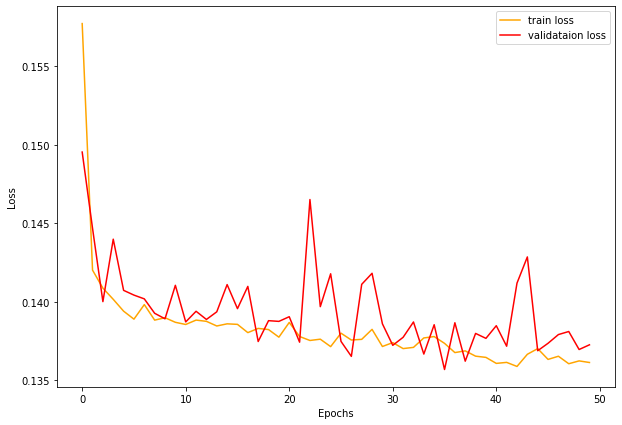

In [26]:
import matplotlib.pyplot as plt 

# plot and save the train and validation line graphs
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(valid_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Showing sample predictions - MODEL 1

In [27]:
anomaly_key = {0: 'existing - filling',
               1: 'existing - root canal treatment',
               2: 'existing - implant',
               3: 'caries low risk',
               4: 'caries moderate risk',
               5: 'caries high risk',
               6: 'periodontitis',
               7: 'none'}

In [28]:
# Using a modified loader to pull in a batch size of one to generate & visualize predictions
valid_loader_b1 = torch.utils.data.DataLoader(dataset, batch_size=1, sampler=valid_sampler)

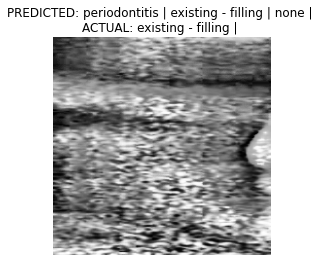

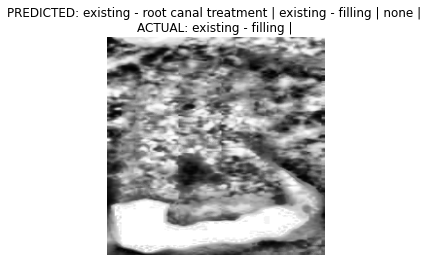

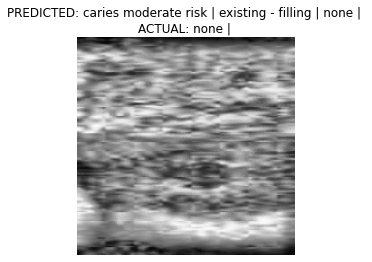

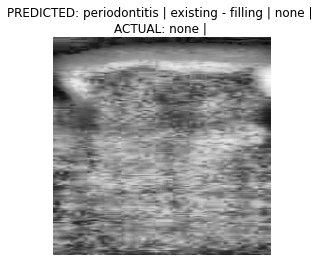

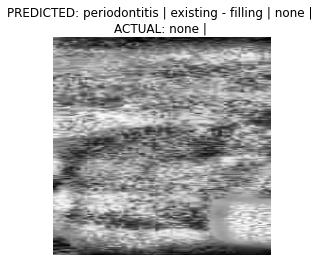

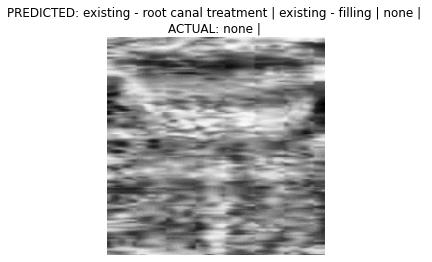

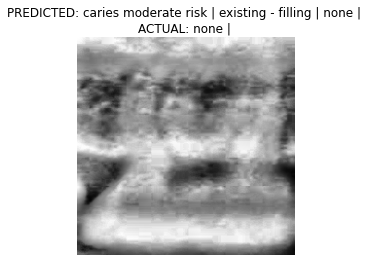

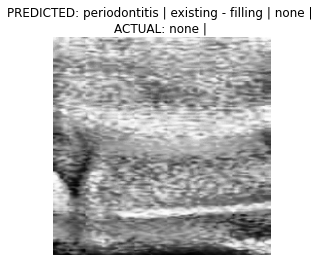

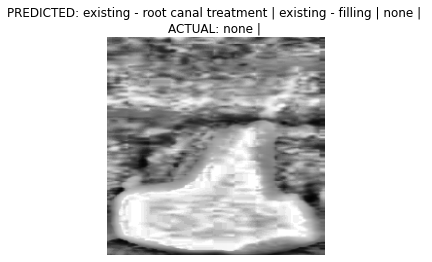

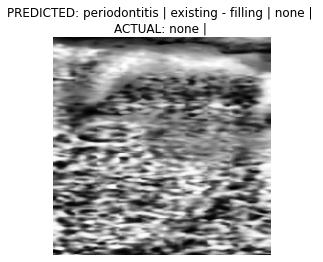

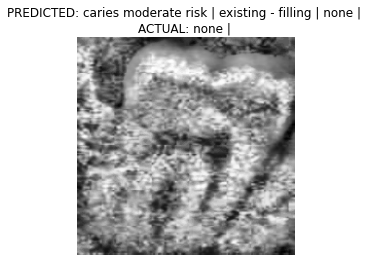

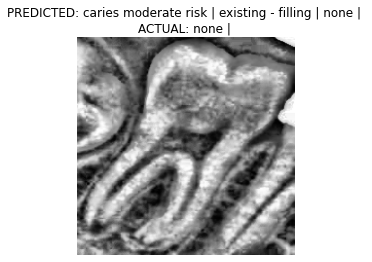

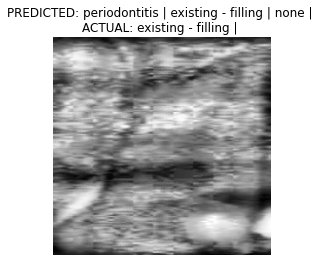

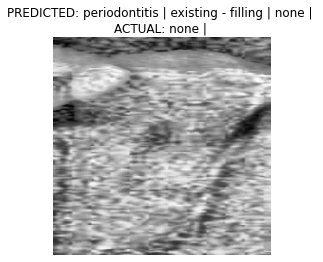

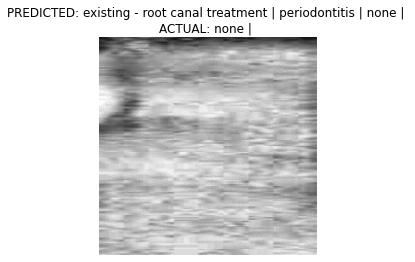

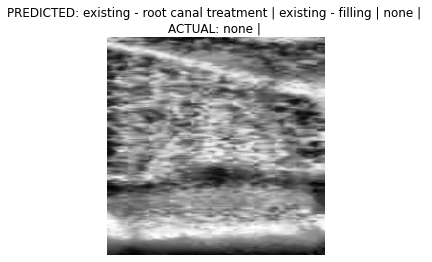

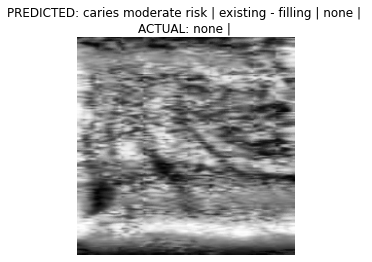

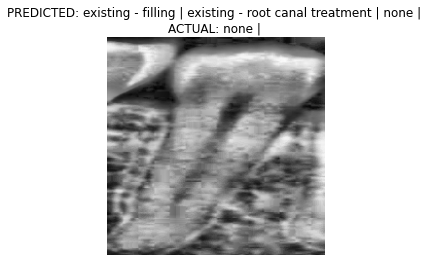

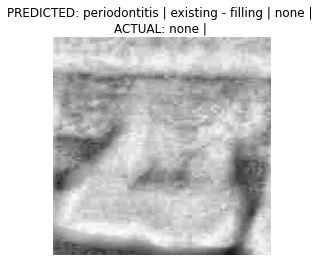

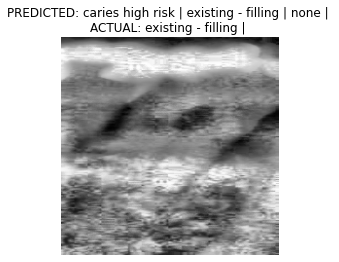

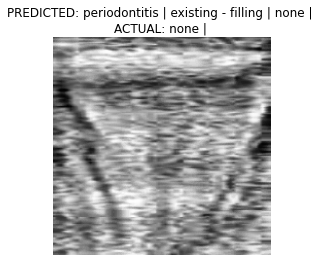

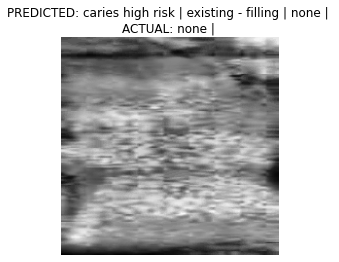

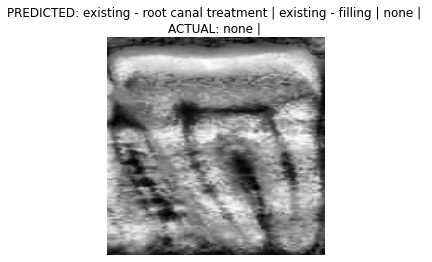

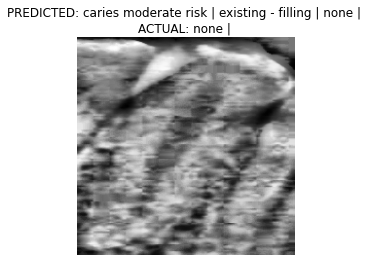

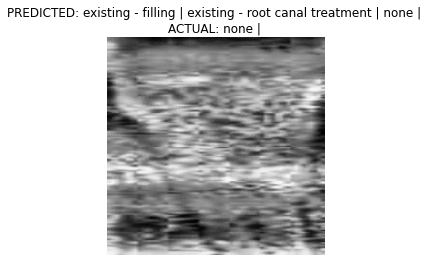

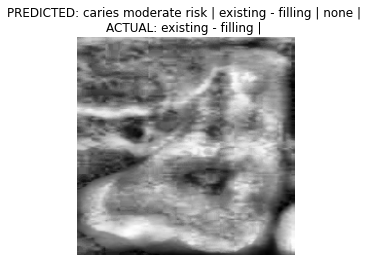

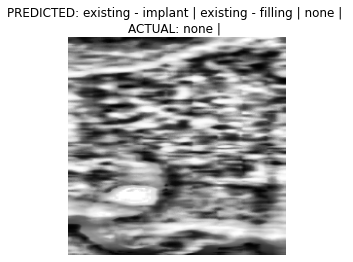

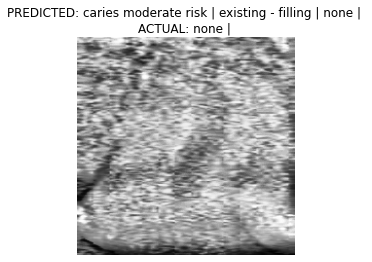

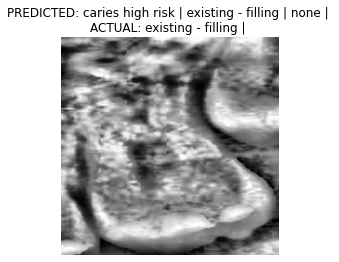

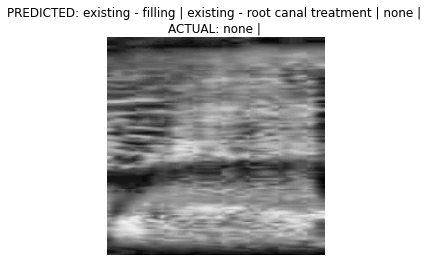

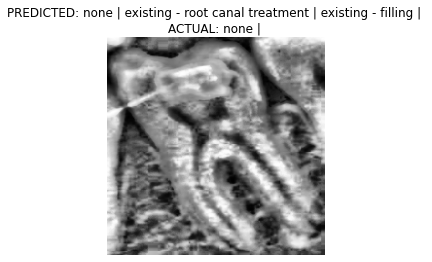

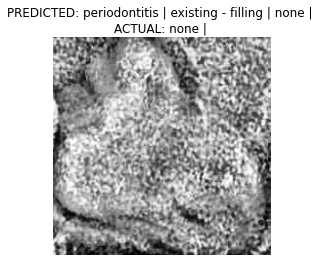

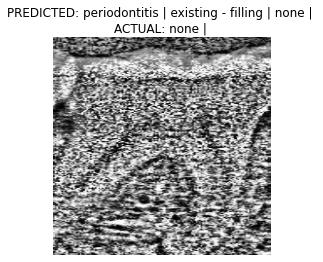

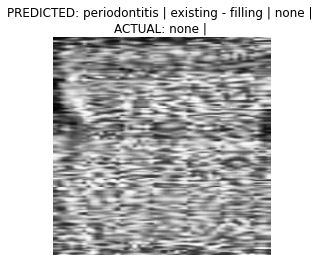

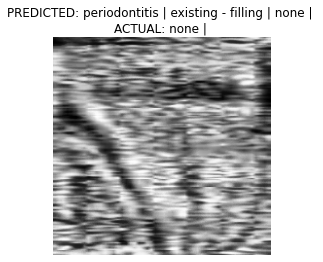

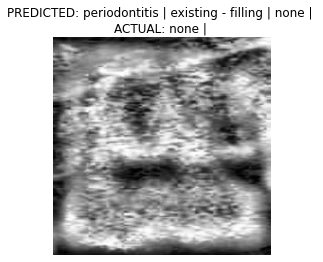

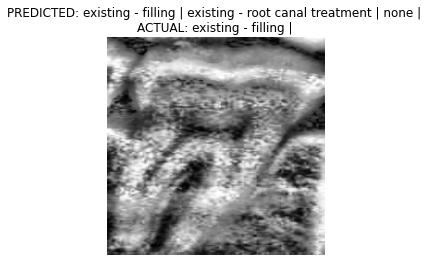

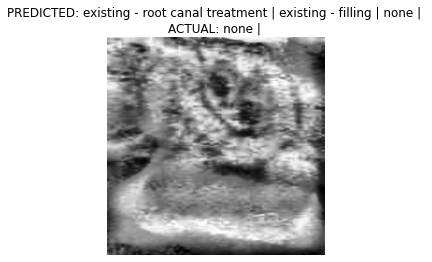

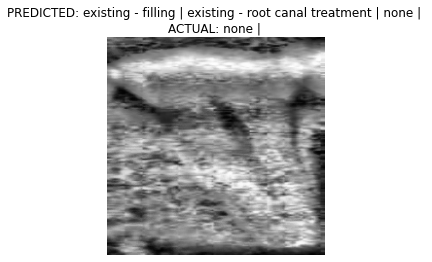

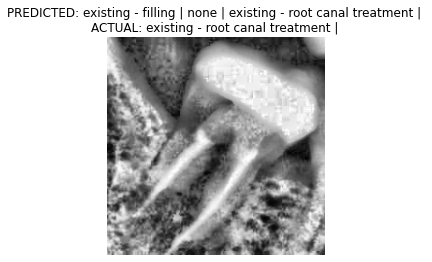

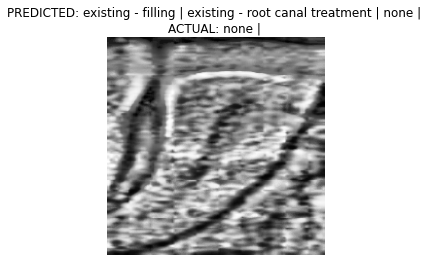

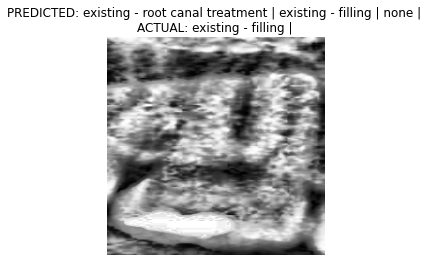

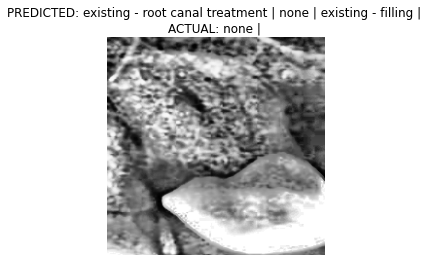

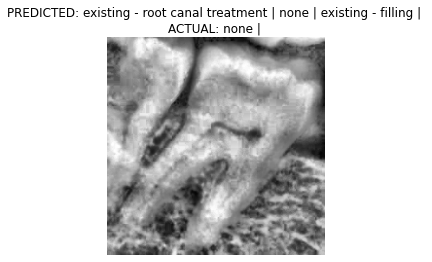

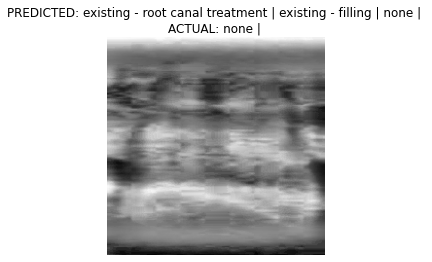

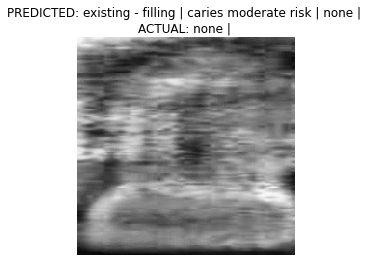

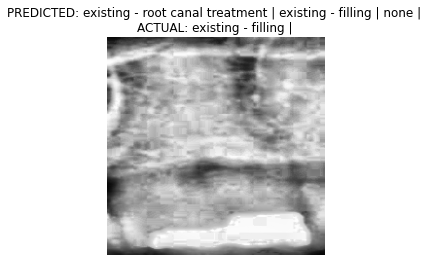

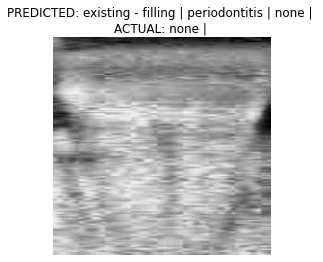

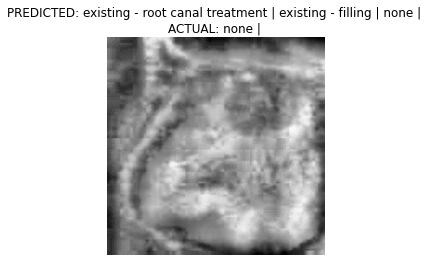

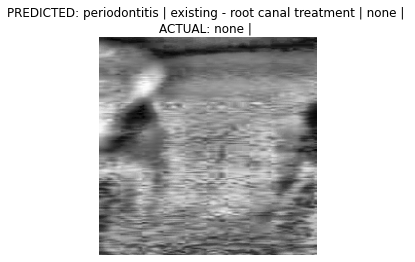

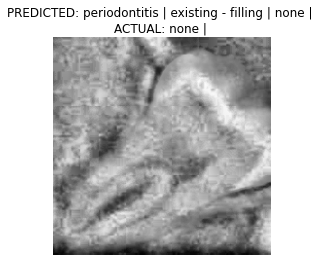

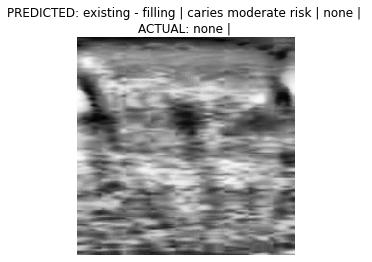

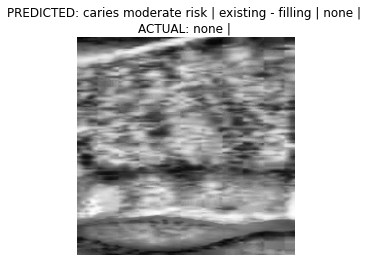

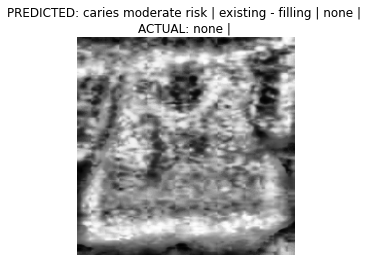

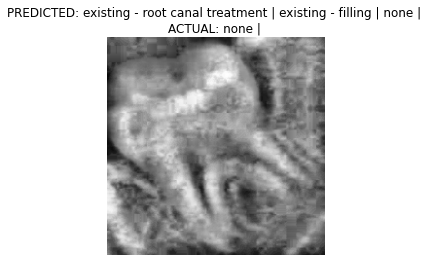

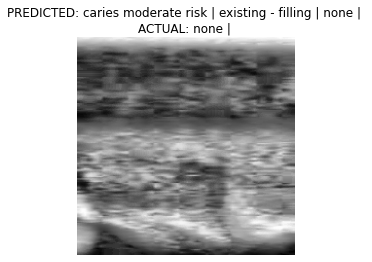

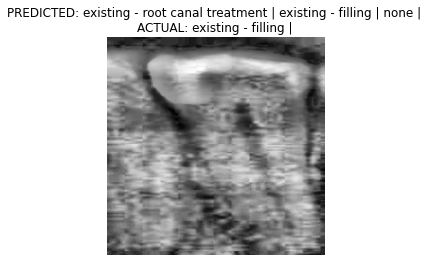

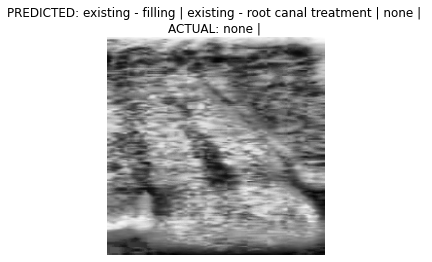

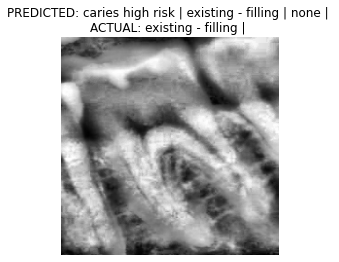

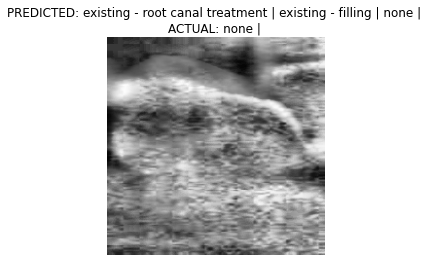

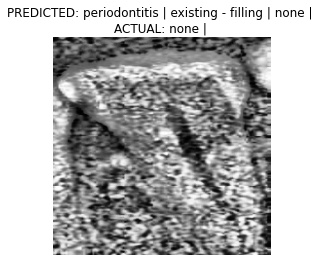

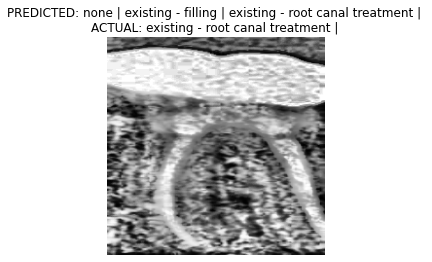

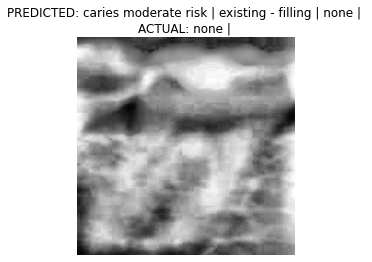

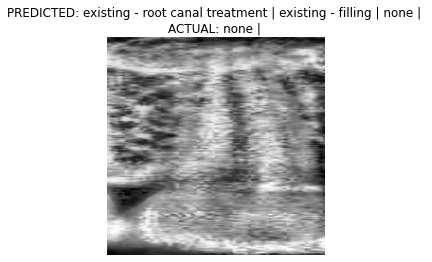

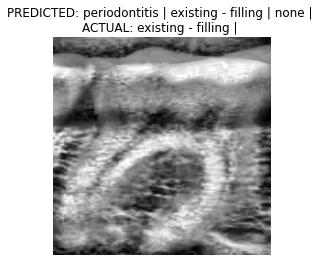

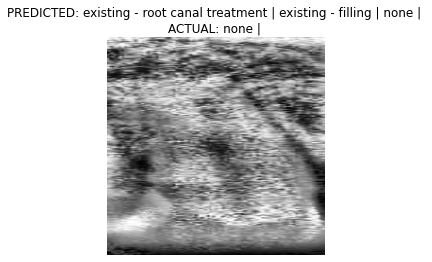

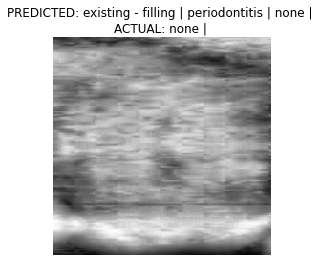

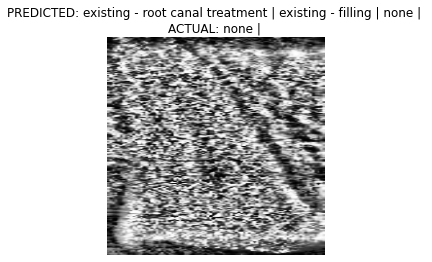

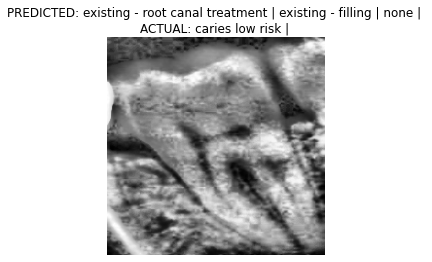

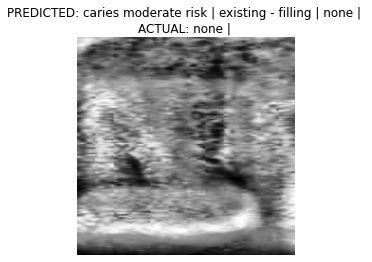

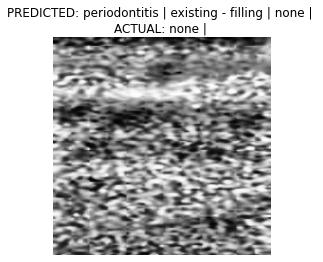

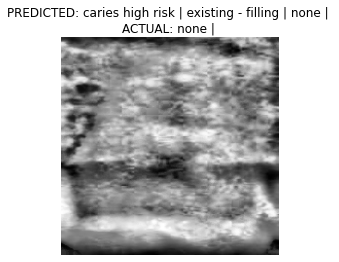

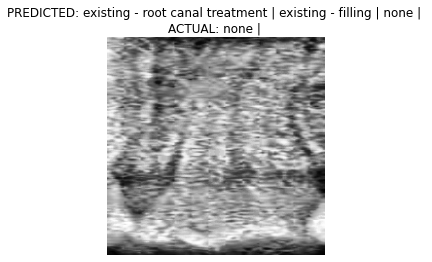

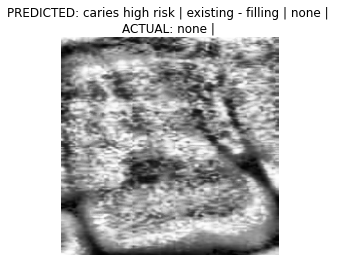

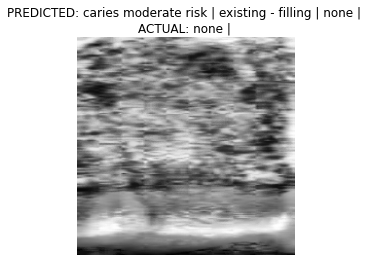

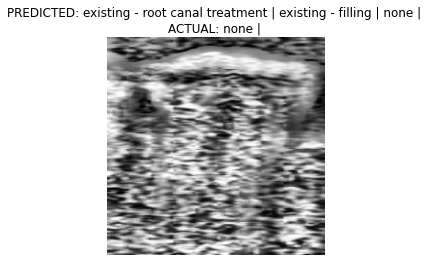

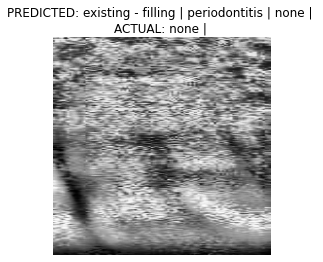

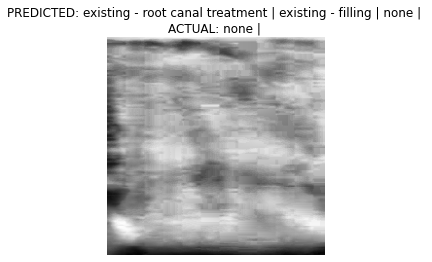

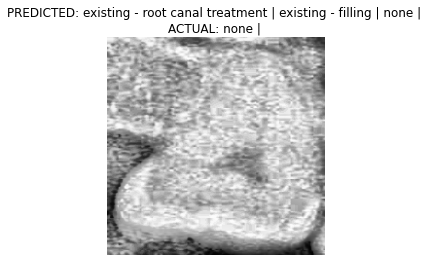

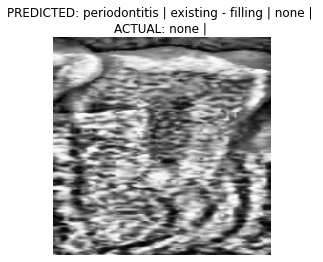

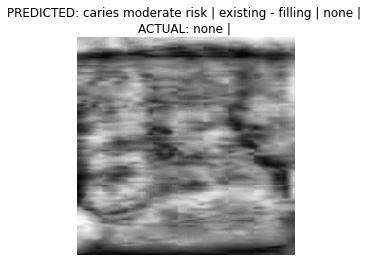

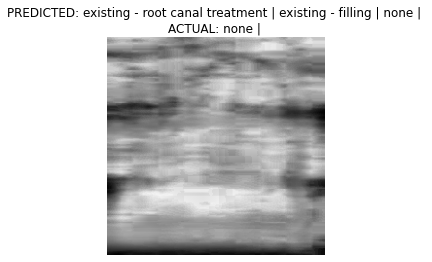

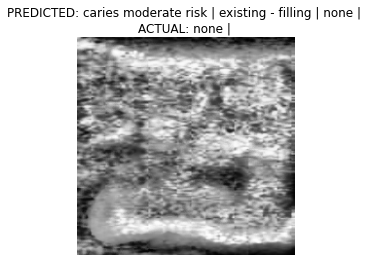

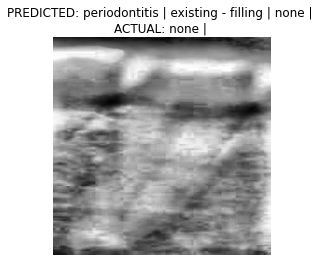

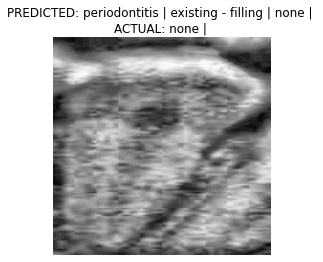

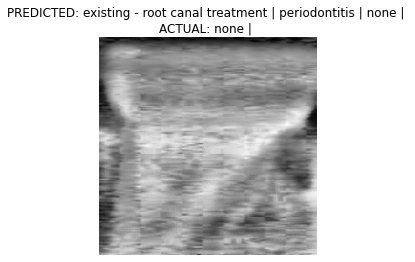

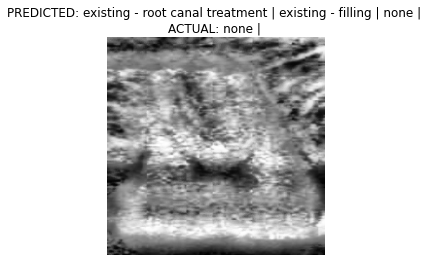

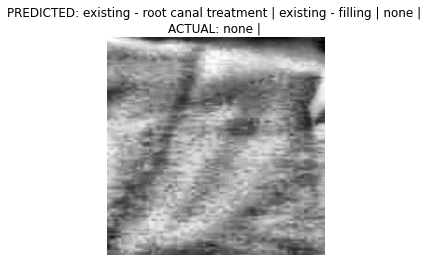

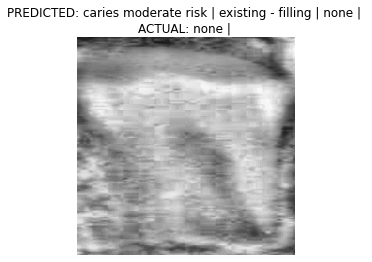

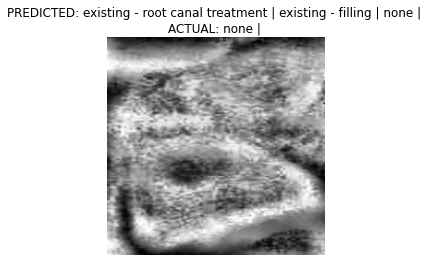

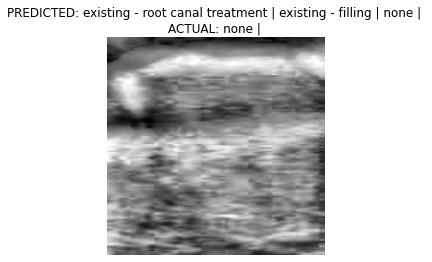

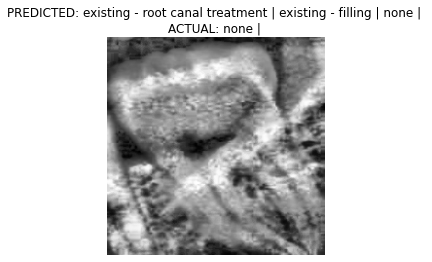

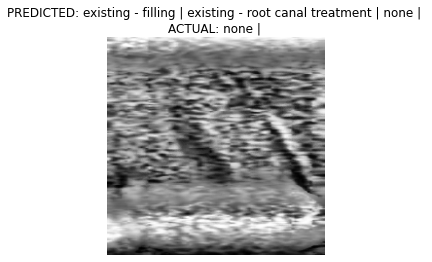

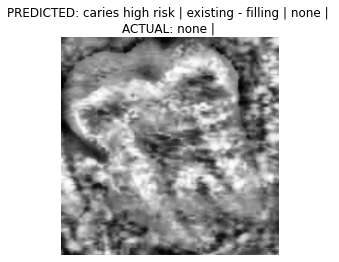

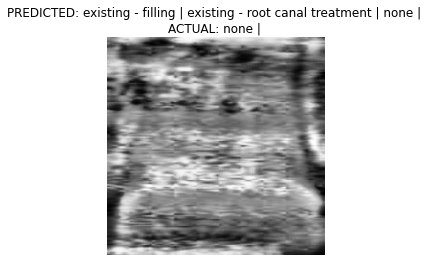

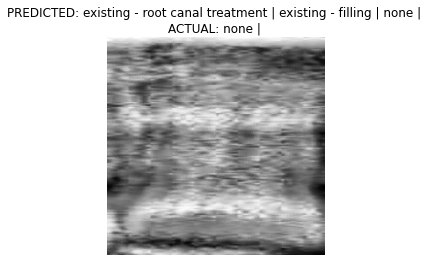

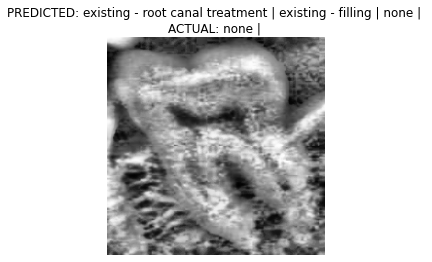

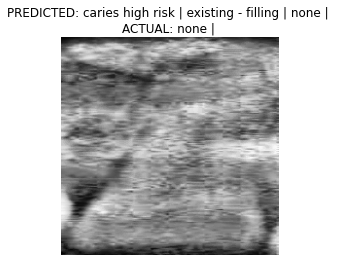

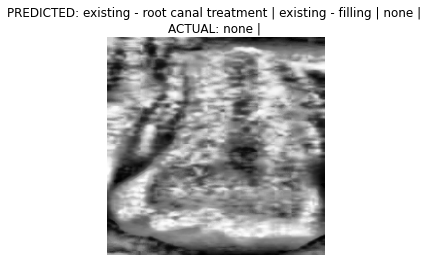

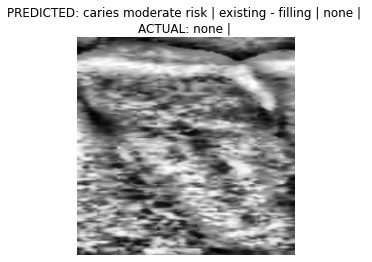

In [29]:
for counter, data in enumerate(valid_loader_b1):
    if counter < 100:
        image, target = data[0].to(device), data[1].squeeze()
        # sample images
        target_indices = [i for i in range(len(target)) if target[i] == 1]
        # get the predictions by passing the image through the model
        outputs = model_v1(image)
        outputs = torch.sigmoid(outputs)
        outputs = outputs.detach().cpu()
        sorted_indices = np.argsort(outputs[0])
        best = sorted_indices[-3:].numpy()
        string_predicted = ''
        string_actual = ''
        for i in range(len(best)):
            string_predicted += f"{anomaly_key[best[i]]} | "
        for i in range(len(target_indices)):
            string_actual += f"{anomaly_key[target_indices[i]]} | "
        image = image.squeeze(0)
        image = image.detach().cpu().numpy()
        image = np.transpose(image, (1, 2, 0))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"PREDICTED: {string_predicted}\nACTUAL: {string_actual}")
    #     plt.savefig(f"outputs_multi_label/inference_{counter}.jpg")
        plt.show()

## Measuring overall performance - MODEL 1

In [30]:
# Generate prediction 'probabilities' per image
predictions = []
actuals = []
for counter, data in enumerate(valid_loader_b1):
    image, target = data[0].to(device), data[1].squeeze()
    outputs = model_v1(image)
    outputs = torch.sigmoid(outputs)
    outputs = outputs.detach().cpu()
    
    predictions += [outputs.squeeze().tolist()]
    actuals += [target.tolist()]

In [31]:
df_predictions = pd.DataFrame(predictions)
df_predictions.head()

0         1         2         3         4         5         6  \
0  0.213876  0.024350  0.000011  0.000160  0.020327  0.010064  0.008793   
1  0.045748  0.004005  0.000052  0.000604  0.001778  0.001021  0.010281   
2  0.021239  0.002024  0.000004  0.000329  0.004700  0.001307  0.005633   
3  0.184490  0.015961  0.000019  0.000171  0.007095  0.002426  0.003253   
4  0.011902  0.016777  0.000197  0.002963  0.007570  0.001960  0.009862   

          7  
0  0.675900  
1  0.925430  
2  0.965294  
3  0.752870  
4  0.976647

In [32]:
df_predictions.describe()

0            1             2            3            4  \
count  2730.000000  2730.000000  2.730000e+03  2730.000000  2730.000000   
mean      0.116569     0.033477  1.541027e-03     0.001741     0.007794   
std       0.133772     0.098548  1.644585e-02     0.003826     0.007730   
min       0.000261     0.000002  2.156713e-07     0.000001     0.000075   
25%       0.020811     0.002761  3.799116e-05     0.000219     0.002519   
50%       0.064197     0.007496  1.655283e-04     0.000612     0.005470   
75%       0.169079     0.021821  6.443778e-04     0.001799     0.010280   
max       0.890793     0.988989  6.550120e-01     0.106616     0.067629   

                 5            6            7  
count  2730.000000  2730.000000  2730.000000  
mean      0.004407     0.006946     0.840868  
std       0.007475     0.007485     0.164301  
min       0.000002     0.000055     0.079430  
25%       0.000657     0.002269     0.767974  
50%       0.001960     0.004620     0.901286  
75%       0.005376     0.008812     0.962521  
max       0.173124     0.108548     0.999084

In [33]:
df_actuals = pd.DataFrame(actuals)

In [34]:
# Check % of each column
df_actuals.mean()

0    0.135165
1    0.022711
2    0.003297
3    0.001832
4    0.004762
5    0.005861
6    0.009890
7    0.825275
dtype: float64

In [35]:
from sklearn.metrics import f1_score
import numpy as np

final_thresholds = []
for label in range(df_predictions.shape[1]):
    thresholds = np.arange(0.0, 1.0, 0.001) 
    f1_scores = []
    for threshold in thresholds:
        y_pred = pd.Series(df_predictions[label] > threshold).astype(int)
        f1_scores += [f1_score(df_actuals[label], y_pred, zero_division = 0)]
    max_f1 = max(f1_scores)
    max_threshold = thresholds[f1_scores.index(max_f1)]
    final_thresholds += [max_threshold]
    print("Class %d: Max F1_score of %.3f at a threshold value of %.5f" % (label, max_f1, max_threshold))

Class 0: Max F1_score of 0.487 at a threshold value of 0.18100
Class 1: Max F1_score of 0.648 at a threshold value of 0.36800
Class 2: Max F1_score of 0.526 at a threshold value of 0.03300
Class 3: Max F1_score of 0.005 at a threshold value of 0.00300
Class 4: Max F1_score of 0.042 at a threshold value of 0.02400
Class 5: Max F1_score of 0.027 at a threshold value of 0.00700
Class 6: Max F1_score of 0.037 at a threshold value of 0.01500
Class 7: Max F1_score of 0.917 at a threshold value of 0.53700


In [36]:
df_predictions_final = df_predictions.copy()
for label in range(df_predictions.shape[1]):
    df_predictions_final[label] = pd.Series(df_predictions[label] > final_thresholds[label]).astype(int)

In [37]:
df_predictions_final['7_modified'] = df_predictions_final[[0, 1, 2, 3, 4, 5, 6]].sum(axis = 1)
df_predictions_final['7_modified'] = [0 if x > 0 else 1 for x in df_predictions_final['7_modified']]

df_actuals['7_modified'] = df_actuals[7]

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for col in df_predictions_final.columns:
    y_pred = df_predictions_final[col]
    y_true = df_actuals[col]
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print("Class %s: PRECISION %.2f, RECALL %.2f, F1 %.2f" % (col, precision, recall, f1))

Class 0: PRECISION 0.39, RECALL 0.66, F1 0.49
Class 1: PRECISION 0.76, RECALL 0.56, F1 0.65
Class 2: PRECISION 0.50, RECALL 0.56, F1 0.53
Class 3: PRECISION 0.00, RECALL 0.20, F1 0.00
Class 4: PRECISION 0.02, RECALL 0.23, F1 0.04
Class 5: PRECISION 0.01, RECALL 0.44, F1 0.03
Class 6: PRECISION 0.02, RECALL 0.22, F1 0.04
Class 7: PRECISION 0.86, RECALL 0.98, F1 0.92
Class 7_modified: PRECISION 0.93, RECALL 0.65, F1 0.76


In [39]:
df_actuals.sum()

0              369.0
1               62.0
2                9.0
3                5.0
4               13.0
5               16.0
6               27.0
7             2253.0
7_modified    2253.0
dtype: float64

## Measuring overall performance - MODEL 2

In [40]:
# Generate prediction 'probabilities' per image
predictions = []
actuals = []
for counter, data in enumerate(valid_loader_b1):
    image, target = data[0].to(device), data[1].squeeze()
    outputs = model_v2(image)
    outputs = torch.sigmoid(outputs)
    outputs = outputs.detach().cpu()
    
    predictions += [outputs.squeeze().tolist()]
    actuals += [target.tolist()]

In [41]:
df_predictions = pd.DataFrame(predictions)
df_predictions.head()

0         1             2             3         4         5  \
0  0.008126  0.000321  3.366420e-07  2.566868e-03  0.008455  0.000122   
1  0.913401  0.000266  6.338644e-04  9.160303e-05  0.000312  0.000078   
2  0.670173  0.085905  1.795425e-10  1.552278e-08  0.009063  0.001031   
3  0.085555  0.388536  2.594359e-07  1.403191e-04  0.002624  0.029086   
4  0.008701  0.000312  4.915898e-06  2.744314e-06  0.000002  0.000003   

          6         7  
0  0.002610  0.980247  
1  0.001508  0.065539  
2  0.000506  0.172738  
3  0.000583  0.530196  
4  0.003416  0.984562

In [42]:
df_predictions.describe()

0             1             2             3             4  \
count  2730.000000  2.730000e+03  2.730000e+03  2.730000e+03  2.730000e+03   
mean      0.190451  2.236745e-02  1.506470e-03  3.599848e-03  1.695662e-03   
std       0.220027  1.082697e-01  3.418492e-02  3.520702e-02  5.766221e-03   
min       0.000511  5.784200e-09  3.530636e-16  4.588245e-13  1.467935e-09   
25%       0.025318  1.589432e-04  4.887740e-10  5.707405e-07  5.320755e-05   
50%       0.097310  8.154605e-04  2.511012e-08  8.352623e-06  2.753035e-04   
75%       0.287954  4.760478e-03  7.598474e-07  1.201367e-04  1.081930e-03   
max       0.987667  9.985155e-01  9.988376e-01  7.061401e-01  1.424094e-01   

                  5             6            7  
count  2.730000e+03  2.730000e+03  2730.000000  
mean   7.291873e-03  2.588598e-03     0.759913  
std    3.133561e-02  7.659440e-03     0.242199  
min    6.480007e-10  1.040691e-07     0.015506  
25%    8.136659e-05  1.181201e-04     0.628695  
50%    5.633952e-04  4.942615e-04     0.854646  
75%    3.136486e-03  1.786239e-03     0.952706  
max    7.467870e-01  1.380404e-01     0.999372

In [43]:
df_actuals = pd.DataFrame(actuals)

In [44]:
# Check % of each column
df_actuals.mean()

0    0.135165
1    0.022711
2    0.003297
3    0.001832
4    0.004762
5    0.005861
6    0.009890
7    0.825275
dtype: float64

In [45]:
from sklearn.metrics import f1_score
import numpy as np

final_thresholds = []
for label in range(df_predictions.shape[1]):
    thresholds = np.arange(0.0, 1.0, 0.001) 
    f1_scores = []
    for threshold in thresholds:
        y_pred = pd.Series(df_predictions[label] > threshold).astype(int)
        f1_scores += [f1_score(df_actuals[label], y_pred, zero_division = 0)]
    max_f1 = max(f1_scores)
    max_threshold = thresholds[f1_scores.index(max_f1)]
    final_thresholds += [max_threshold]
    print("Class %d: Max F1_score of %.3f at a threshold value of %.5f" % (label, max_f1, max_threshold))

Class 0: Max F1_score of 0.523 at a threshold value of 0.39500
Class 1: Max F1_score of 0.692 at a threshold value of 0.20200
Class 2: Max F1_score of 0.571 at a threshold value of 0.12000
Class 3: Max F1_score of 0.006 at a threshold value of 0.00100
Class 4: Max F1_score of 0.080 at a threshold value of 0.03400
Class 5: Max F1_score of 0.023 at a threshold value of 0.00300
Class 6: Max F1_score of 0.049 at a threshold value of 0.02200
Class 7: Max F1_score of 0.921 at a threshold value of 0.28700


In [46]:
df_predictions_final = df_predictions.copy()
for label in range(df_predictions.shape[1]):
    df_predictions_final[label] = pd.Series(df_predictions[label] > final_thresholds[label]).astype(int)

In [47]:
df_predictions_final['7_modified'] = df_predictions_final[[0, 1, 2, 3, 4, 5, 6]].sum(axis = 1)
df_predictions_final['7_modified'] = [0 if x > 0 else 1 for x in df_predictions_final['7_modified']]

df_actuals['7_modified'] = df_actuals[7]

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for col in df_predictions_final.columns:
    y_pred = df_predictions_final[col]
    y_true = df_actuals[col]
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print("Class %s: PRECISION %.2f, RECALL %.2f, F1 %.2f" % (col, precision, recall, f1))

Class 0: PRECISION 0.46, RECALL 0.60, F1 0.52
Class 1: PRECISION 0.66, RECALL 0.73, F1 0.69
Class 2: PRECISION 0.80, RECALL 0.44, F1 0.57
Class 3: PRECISION 0.00, RECALL 0.20, F1 0.01
Class 4: PRECISION 0.08, RECALL 0.08, F1 0.08
Class 5: PRECISION 0.01, RECALL 0.50, F1 0.02
Class 6: PRECISION 0.04, RECALL 0.07, F1 0.05
Class 7: PRECISION 0.87, RECALL 0.98, F1 0.92
Class 7_modified: PRECISION 0.93, RECALL 0.64, F1 0.76


In [49]:
df_actuals.sum()

0              369.0
1               62.0
2                9.0
3                5.0
4               13.0
5               16.0
6               27.0
7             2253.0
7_modified    2253.0
dtype: float64

## Measuring overall performance - MODEL 3

In [50]:
# Generate prediction 'probabilities' per image
predictions = []
actuals = []
for counter, data in enumerate(valid_loader_b1):
    image, target = data[0].to(device), data[1].squeeze()
    outputs = model_v3(image)
    outputs = torch.sigmoid(outputs)
    outputs = outputs.detach().cpu()
    
    predictions += [outputs.squeeze().tolist()]
    actuals += [target.tolist()]

In [51]:
df_predictions = pd.DataFrame(predictions)
df_predictions.head()

0         1         2         3         4         5         6  \
0  0.085532  0.020545  0.000645  0.000470  0.004099  0.004352  0.003794   
1  0.100794  0.021917  0.000752  0.000512  0.004598  0.004644  0.004647   
2  0.106370  0.020914  0.000830  0.000440  0.006050  0.004915  0.004319   
3  0.226061  0.038884  0.002311  0.001065  0.007750  0.009901  0.007470   
4  0.070021  0.023302  0.000571  0.000471  0.005364  0.004277  0.003905   

          7  
0  0.921861  
1  0.897739  
2  0.888538  
3  0.758922  
4  0.918045

In [52]:
df_predictions.describe()

0            1             2             3            4  \
count  2730.000000  2730.000000  2.730000e+03  2.730000e+03  2730.000000   
mean      0.134902     0.025413  1.477321e-03  6.571473e-04     0.006170   
std       0.076440     0.007064  1.072827e-03  2.774469e-04     0.001659   
min       0.047700     0.000112  5.701568e-16  5.239486e-15     0.000013   
25%       0.089185     0.020651  7.509485e-04  4.733017e-04     0.005112   
50%       0.121021     0.024198  1.078969e-03  5.870314e-04     0.005891   
75%       0.165091     0.029240  1.853093e-03  7.830001e-04     0.006986   
max       0.987807     0.059008  7.007186e-03  1.964774e-03     0.015771   

                  5             6            7  
count  2.730000e+03  2.730000e+03  2730.000000  
mean   6.291408e-03  5.806409e-03     0.854786  
std    2.419863e-03  1.946003e-03     0.064024  
min    9.879766e-08  3.014157e-09     0.069901  
25%    4.543447e-03  4.642938e-03     0.820714  
50%    5.760240e-03  5.335195e-03     0.867212  
75%    7.687161e-03  6.500640e-03     0.899378  
max    1.713853e-02  1.612303e-02     0.950686

In [53]:
df_actuals = pd.DataFrame(actuals)

In [54]:
# Check % of each column
df_actuals.mean()

0    0.135165
1    0.022711
2    0.003297
3    0.001832
4    0.004762
5    0.005861
6    0.009890
7    0.825275
dtype: float64

In [55]:
from sklearn.metrics import f1_score
import numpy as np

final_thresholds = []
for label in range(df_predictions.shape[1]):
    thresholds = np.arange(0.0, 1.0, 0.001) 
    f1_scores = []
    for threshold in thresholds:
        y_pred = pd.Series(df_predictions[label] > threshold).astype(int)
        f1_scores += [f1_score(df_actuals[label], y_pred, zero_division = 0)]
    max_f1 = max(f1_scores)
    max_threshold = thresholds[f1_scores.index(max_f1)]
    final_thresholds += [max_threshold]
    print("Class %d: Max F1_score of %.3f at a threshold value of %.5f" % (label, max_f1, max_threshold))

Class 0: Max F1_score of 0.305 at a threshold value of 0.14300
Class 1: Max F1_score of 0.067 at a threshold value of 0.02900
Class 2: Max F1_score of 0.016 at a threshold value of 0.00400
Class 3: Max F1_score of 0.006 at a threshold value of 0.00100
Class 4: Max F1_score of 0.012 at a threshold value of 0.00700
Class 5: Max F1_score of 0.100 at a threshold value of 0.01500
Class 6: Max F1_score of 0.047 at a threshold value of 0.01300
Class 7: Max F1_score of 0.904 at a threshold value of 0.07000


In [56]:
df_predictions_final = df_predictions.copy()
for label in range(df_predictions.shape[1]):
    df_predictions_final[label] = pd.Series(df_predictions[label] > final_thresholds[label]).astype(int)

In [57]:
df_predictions_final['7_modified'] = df_predictions_final[[0, 1, 2, 3, 4, 5, 6]].sum(axis = 1)
df_predictions_final['7_modified'] = [0 if x > 0 else 1 for x in df_predictions_final['7_modified']]

df_actuals['7_modified'] = df_actuals[7]

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for col in df_predictions_final.columns:
    y_pred = df_predictions_final[col]
    y_true = df_actuals[col]
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print("Class %s: PRECISION %.2f, RECALL %.2f, F1 %.2f" % (col, precision, recall, f1))

Class 0: PRECISION 0.21, RECALL 0.56, F1 0.31
Class 1: PRECISION 0.04, RECALL 0.42, F1 0.07
Class 2: PRECISION 0.01, RECALL 0.11, F1 0.02
Class 3: PRECISION 0.00, RECALL 0.20, F1 0.01
Class 4: PRECISION 0.01, RECALL 0.31, F1 0.01
Class 5: PRECISION 0.25, RECALL 0.06, F1 0.10
Class 6: PRECISION 0.06, RECALL 0.04, F1 0.05
Class 7: PRECISION 0.83, RECALL 1.00, F1 0.90
Class 7_modified: PRECISION 0.88, RECALL 0.62, F1 0.73


In [59]:
df_actuals.sum()

0              369.0
1               62.0
2                9.0
3                5.0
4               13.0
5               16.0
6               27.0
7             2253.0
7_modified    2253.0
dtype: float64